# Project Methodology:CRISPML(Q)







## Business objective: Maximizing customer retention and optimizing marketing strategies.


## Business constraints: Budget, time, regulatory, and operational limitations.

# importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV


# Loading Data Set

In [2]:
df = pd.read_csv(r"C:\Users\ravin\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.drop('customerID',axis=1,inplace=True)

In [6]:
cat_col = df.select_dtypes(include='object').columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated().sum()

22

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [11]:
df['TotalCharges'].isna().sum()

11

In [12]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# 1.Exploratory Data Analysis

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1a.univariate Analysis

In [15]:
df.describe(include='object')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [16]:
df['Churn'].value_counts(normalize=True)*100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

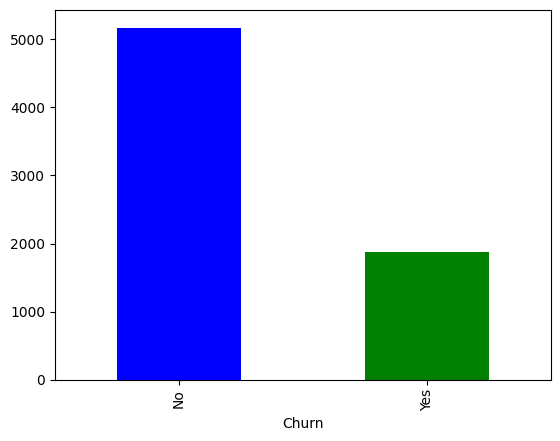

In [17]:
df['Churn'].value_counts().plot(kind='bar',color=['b','g'])
plt.show()

In [18]:
cat_col

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [218]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

# How many of churns in each catagorical column

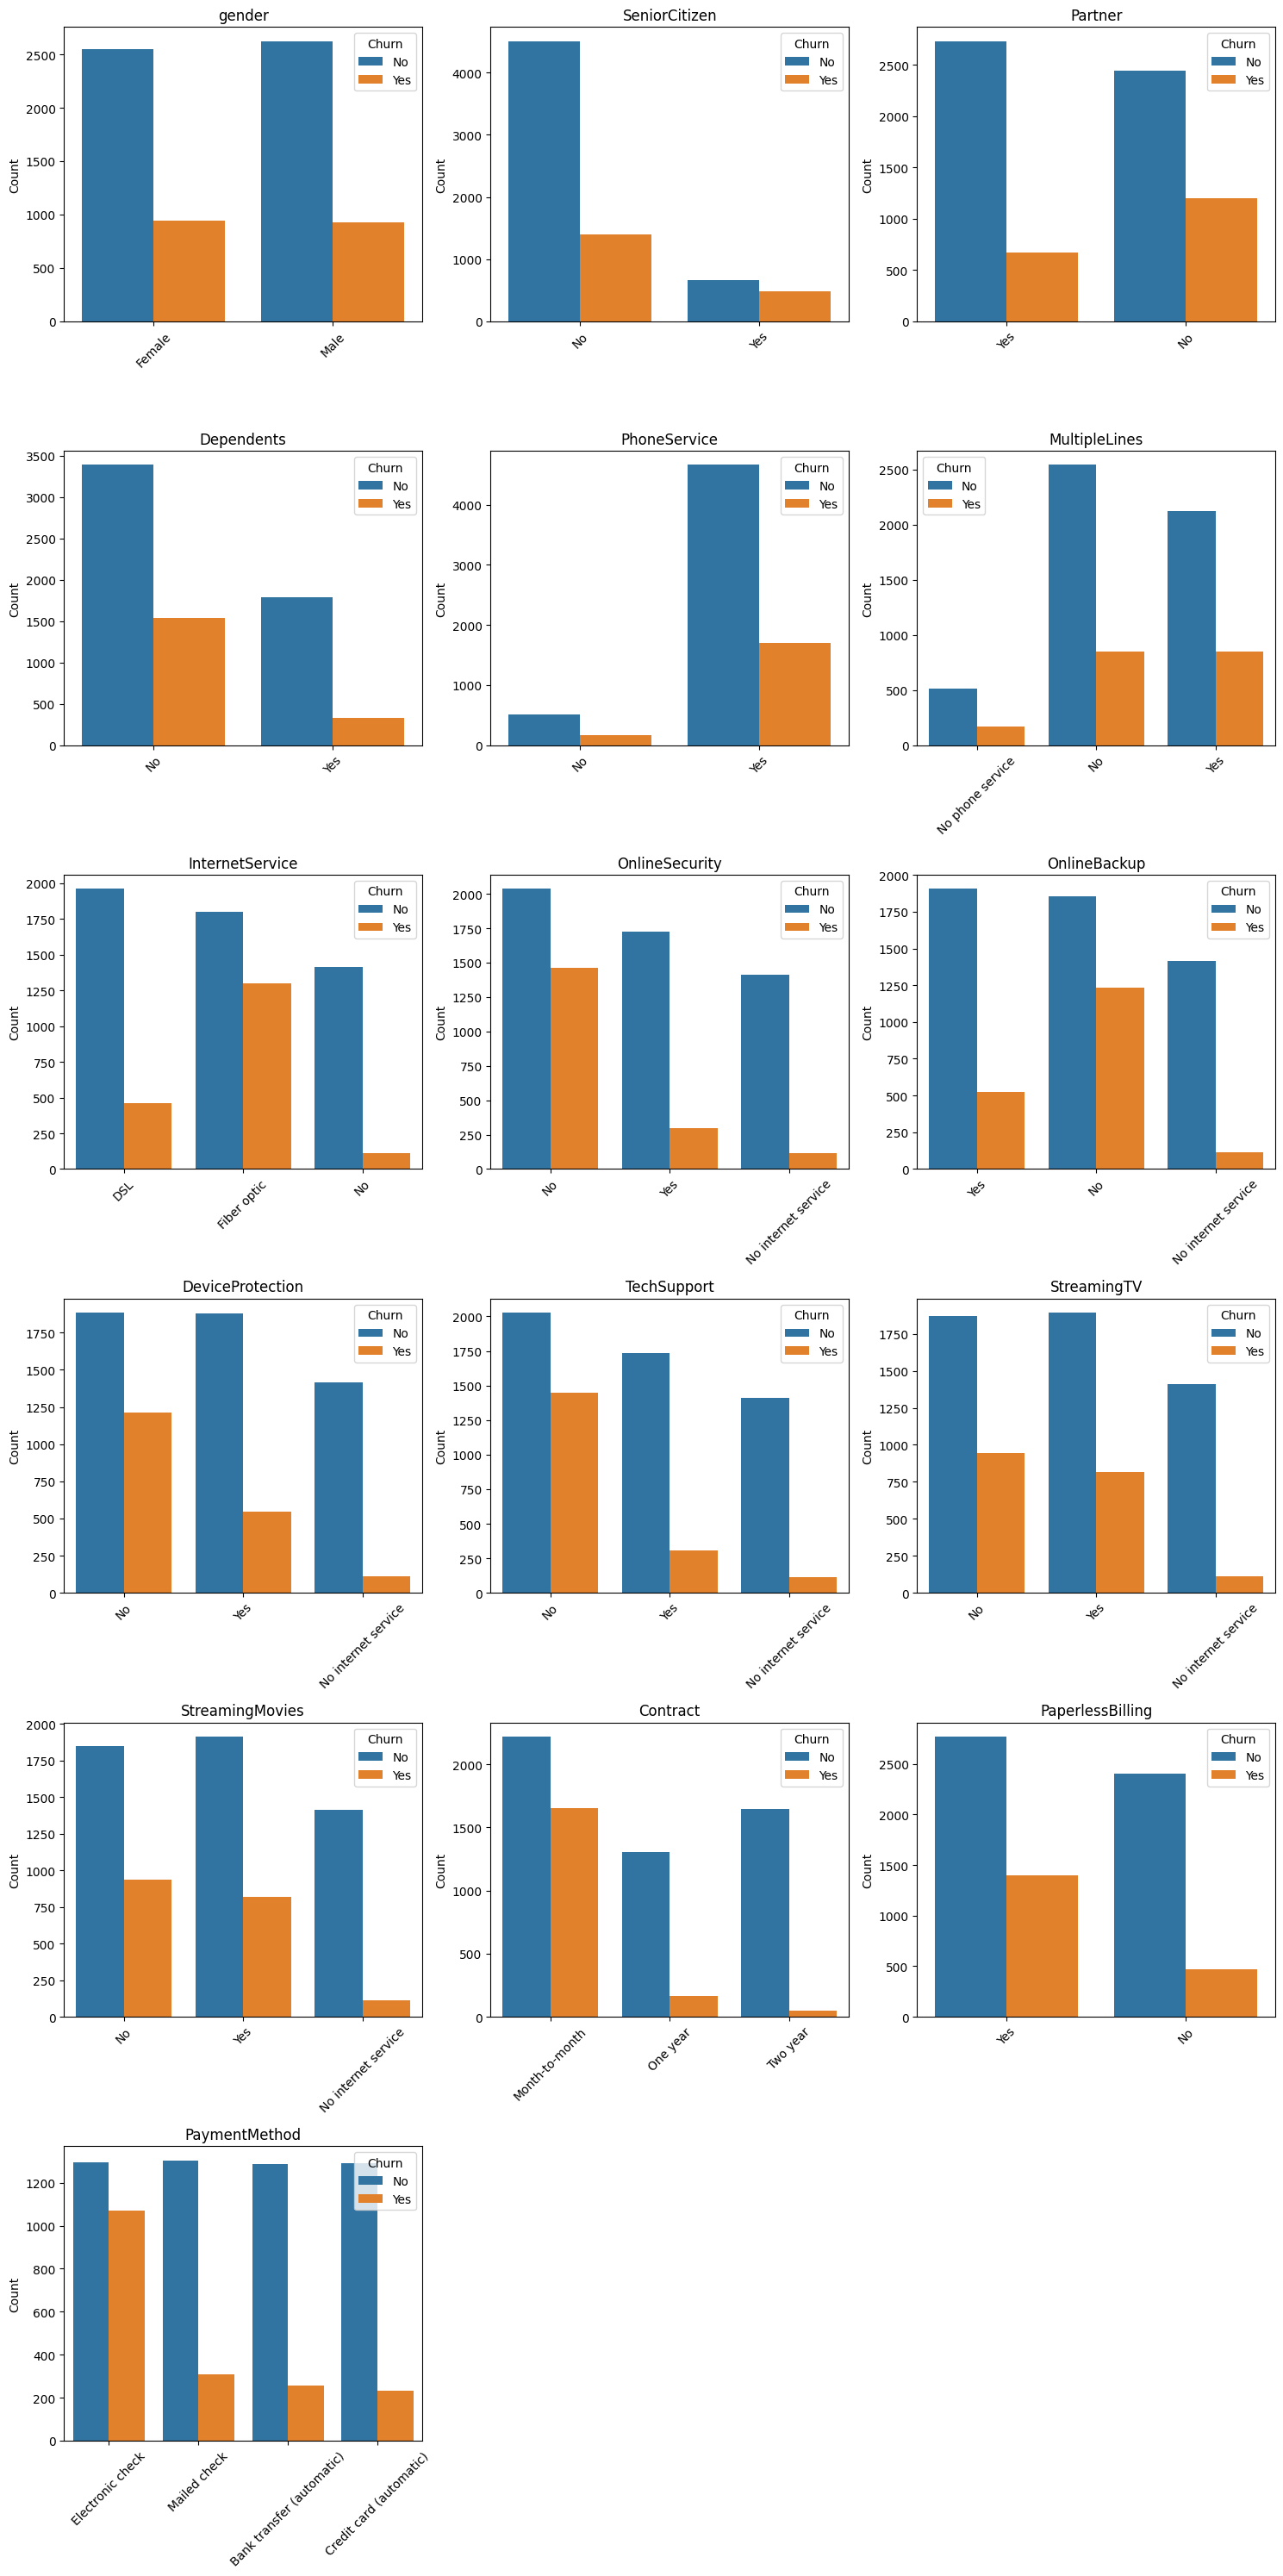

In [219]:
num_cols = 3 
num_rows = (len(cat_col) - 1) // num_cols + 1 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()
for i, col in enumerate(cat_col):
    ax = axes[i]
    sns.countplot(x=col, data=df, hue='Churn', ax=ax)
    ax.set_title(col)
    ax.legend(title='Churn')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
if len(cat_col) < num_rows * num_cols:
    for i in range(len(cat_col), num_rows * num_cols):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [21]:
len(cat_col)

17

# Each column Distribution

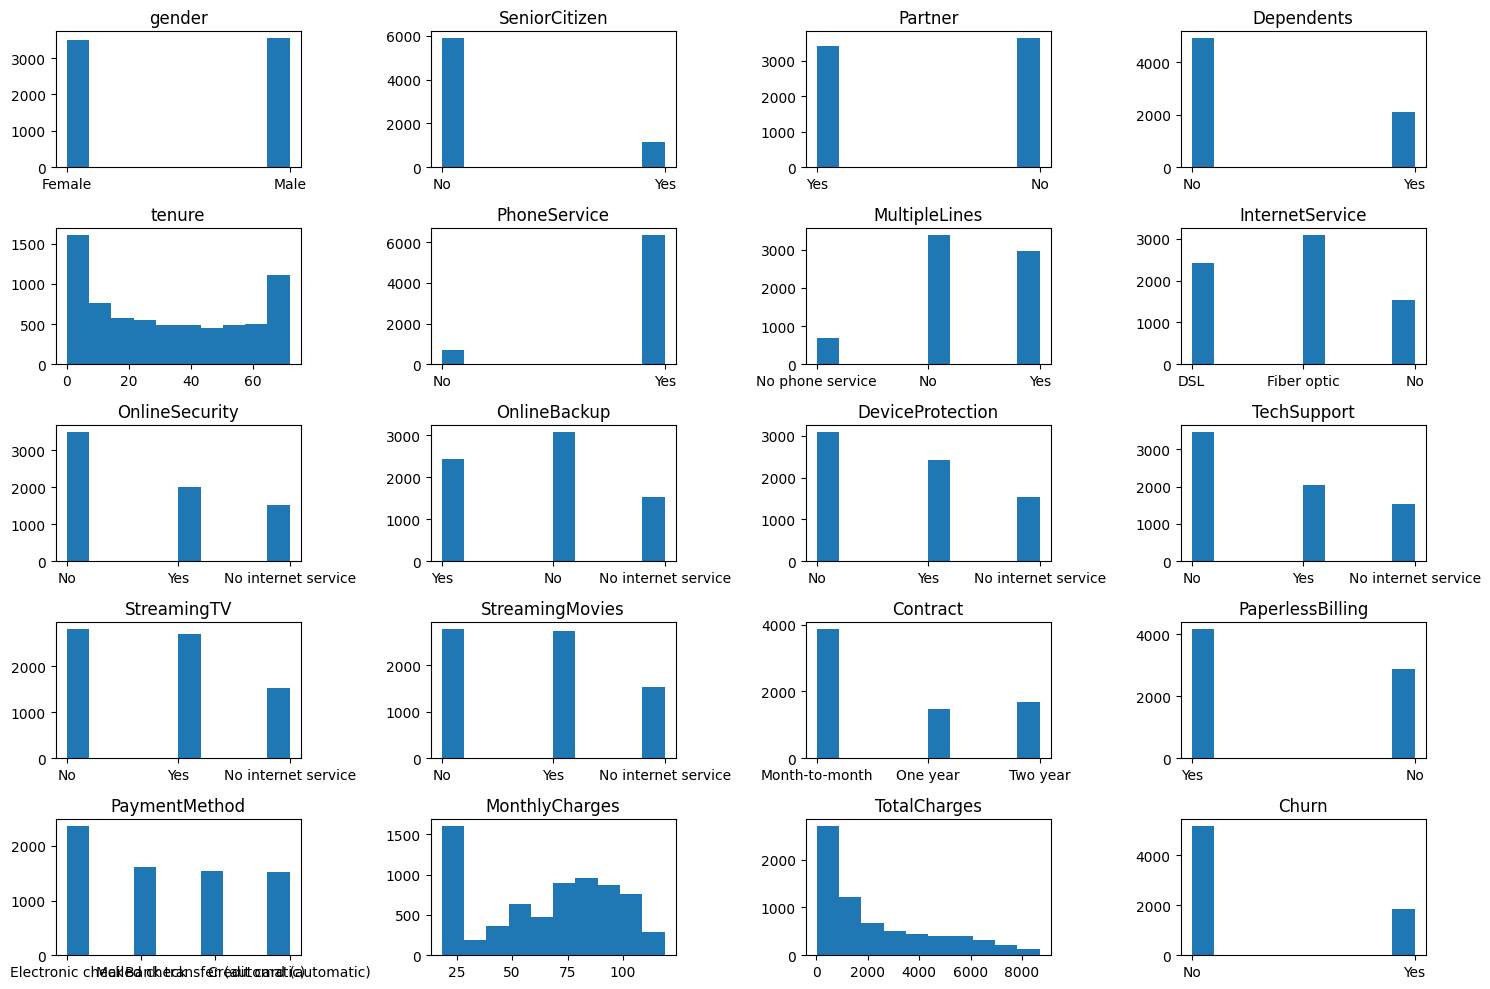

In [22]:
le = len(df.columns)
num_rows = 5
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axs = axs.flatten()
for i, col in enumerate(df.columns):
    if i < le: 
        axs[i].hist(df[col]) 
        axs[i].set_title(col) 
    else:
        break  

plt.tight_layout()
plt.show()


# 1b.Bivariate Analysis

In [23]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
num_col = df.select_dtypes(exclude='object').columns

In [25]:
num_col

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [26]:
cat_col = df.select_dtypes(include='object').columns

In [27]:
cat_col

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

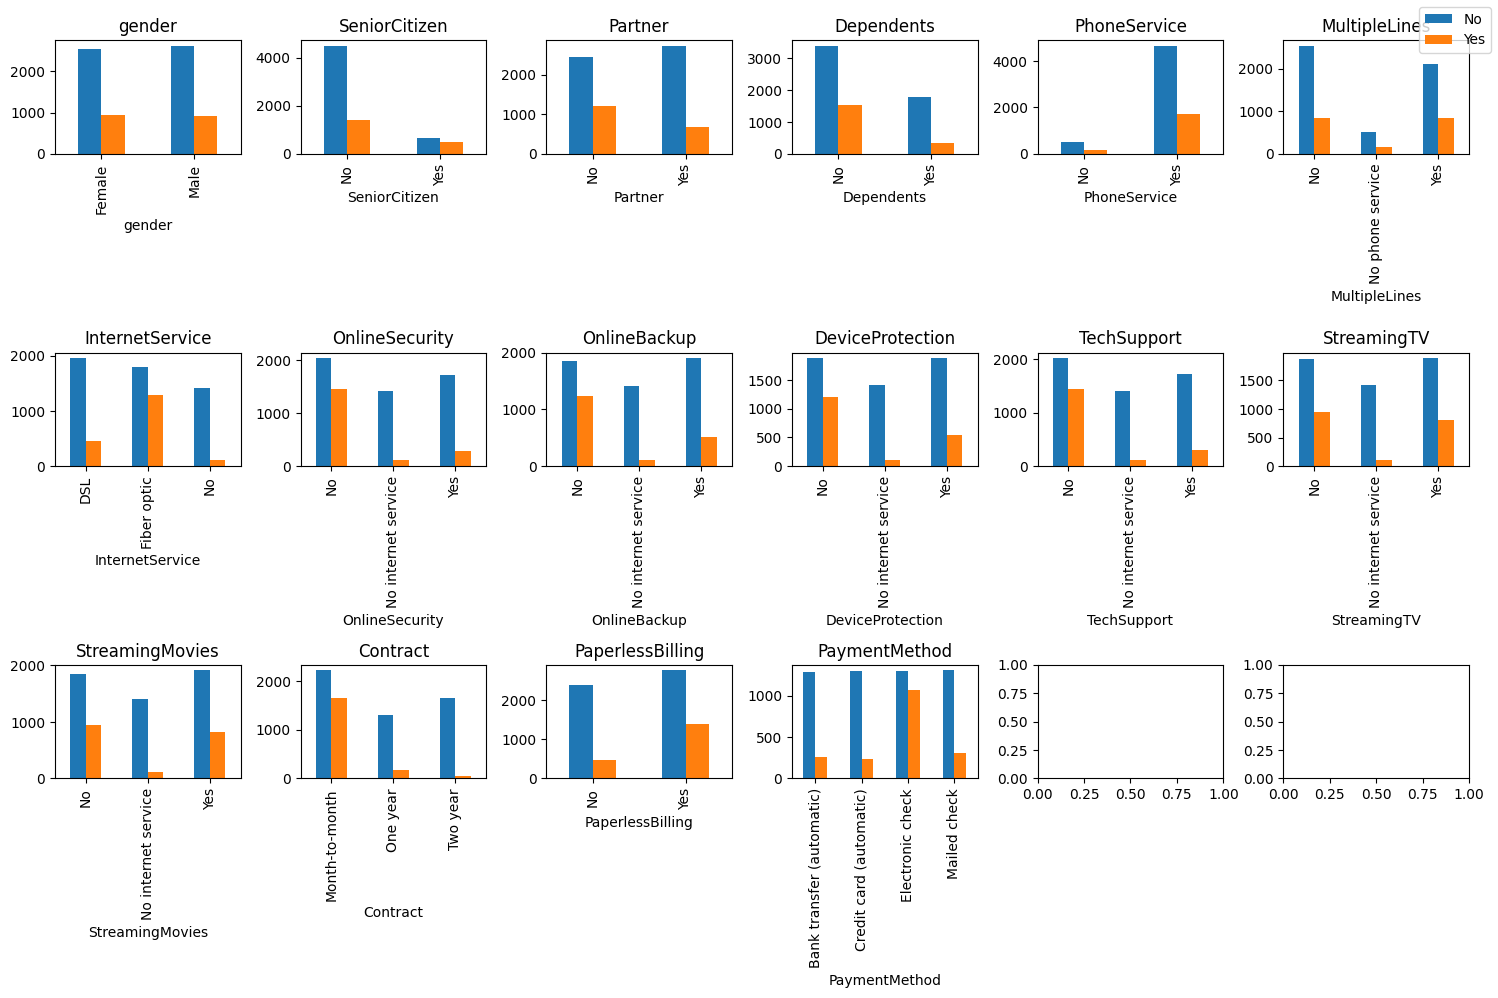

In [28]:
le = len(df[cat_col])
num_rows = 3
num_cols = 6
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axs = axs.flatten()
for i, col in enumerate(df[cat_col]):
    if i < le and col != 'Churn':
        pd.crosstab(df[col], df['Churn']).plot(kind='bar', ax=axs[i], legend=False)
        axs[i].set_title(col) 
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()


# corelation b/w continousde features

In [29]:
num_col

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [30]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


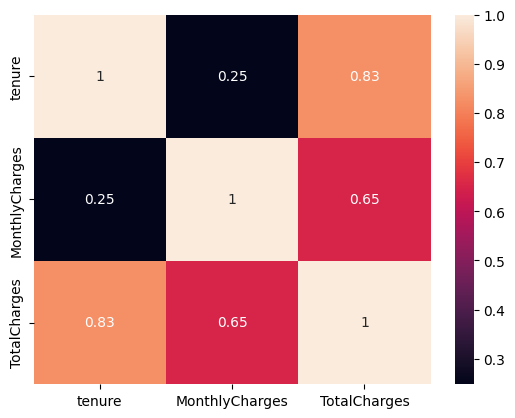

In [31]:
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(),annot=True)
plt.show()

# Churn Vs tenure

<Axes: xlabel='Churn', ylabel='tenure'>

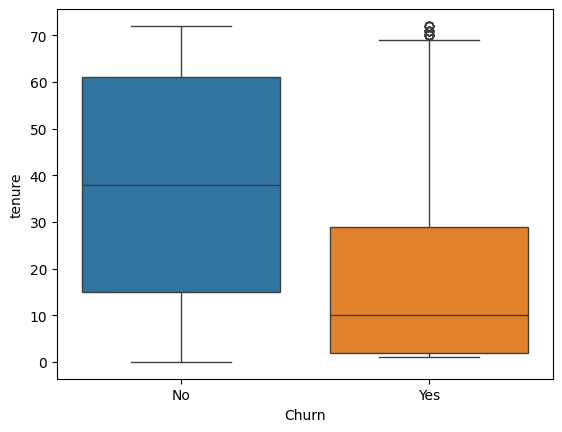

In [32]:
sns.boxplot(x='Churn',y='tenure',data=df,hue='Churn')

# churn Vs MonthlyCharges

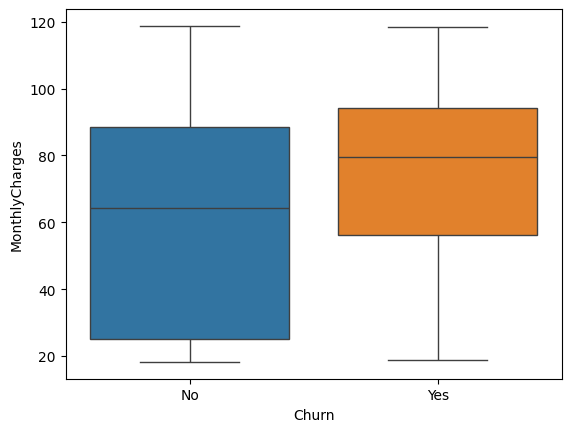

In [33]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=df,hue='Churn')
plt.show()

# churn Vs TotalCharges

<Axes: xlabel='Churn', ylabel='TotalCharges'>

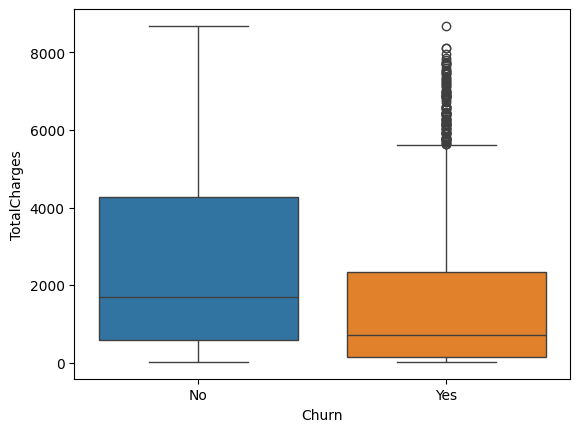

In [34]:
sns.boxplot(x='Churn',y='TotalCharges',data=df,hue='Churn')

# tenure Vs Totalcharges

<Axes: xlabel='tenure', ylabel='TotalCharges'>

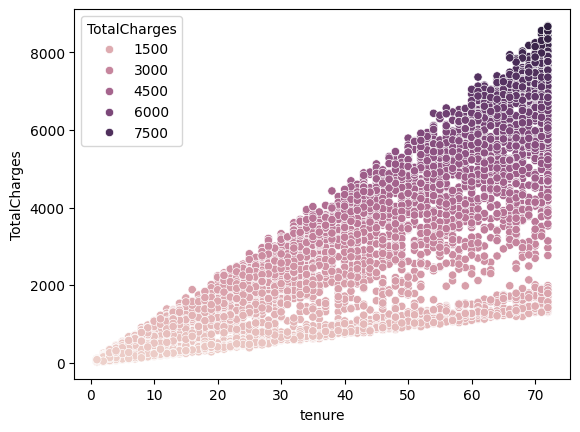

In [35]:
sns.scatterplot(x='tenure',y='TotalCharges',data=df,hue='TotalCharges')

# MonthlyCharges VS TotalCharges

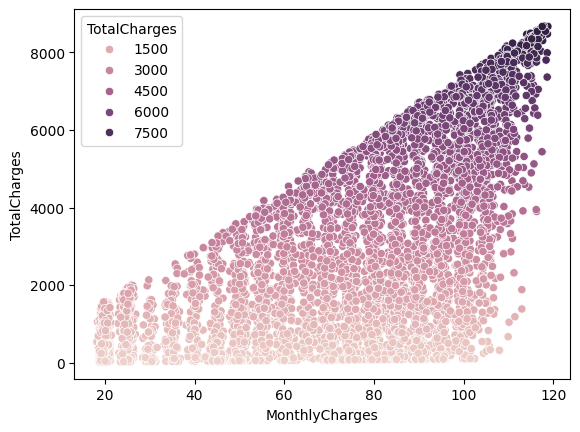

In [36]:
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=df,hue='TotalCharges')
plt.show()

In [37]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [38]:
cat_col

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

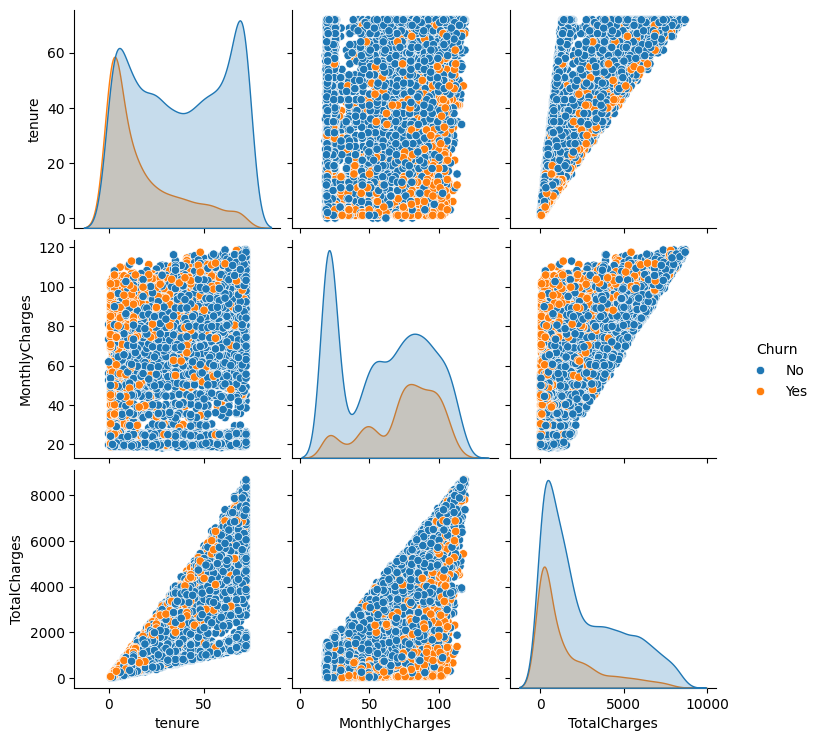

In [39]:
sns.pairplot(df,hue='Churn')
plt.show()

# 1c. Multivariatre Analysis

# Gender vs SeniorCitizen vs Churn

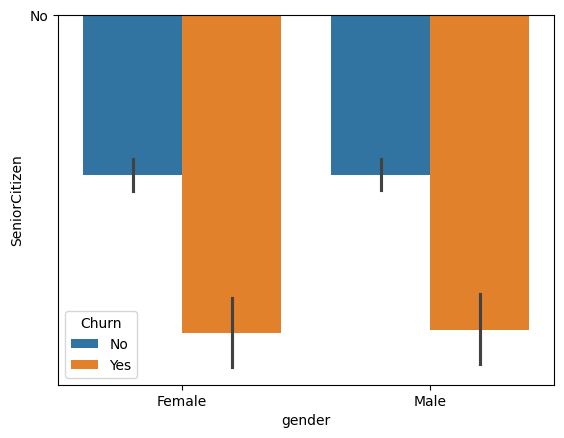

In [40]:
sns.barplot(x='gender',y='SeniorCitizen',hue='Churn',data=df)
plt.show()

# gender vs tenure vs Churn

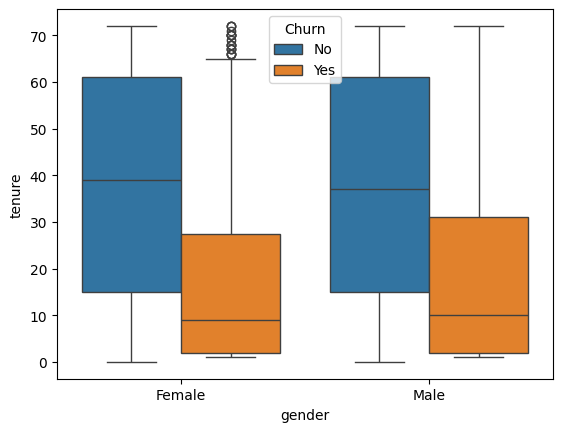

In [41]:
sns.boxplot(x='gender',y='tenure',hue='Churn',data=df)
plt.show()

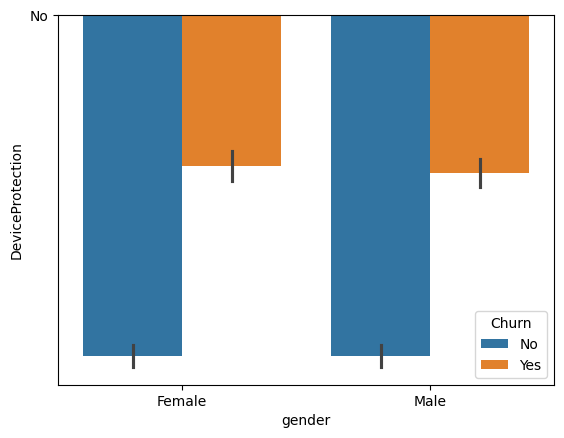

In [42]:
sns.barplot(x='gender',y='DeviceProtection',hue='Churn',data=df)
plt.show()

# Anaysis of all combinations of categorical columns

In [43]:
import itertools


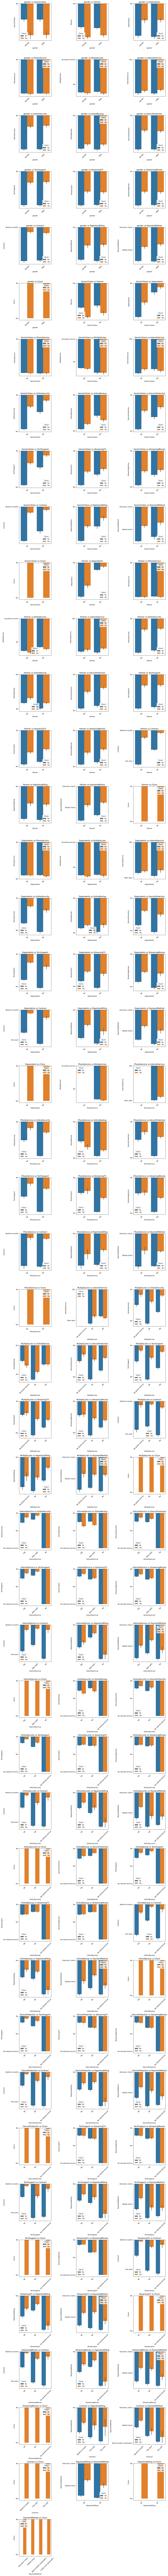

In [44]:

cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
combinations = list(itertools.combinations(cat_cols, 2))
num_plots = len(combinations)
num_cols = 3  
num_rows = (num_plots - 1) // num_cols + 1 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, combination in enumerate(combinations):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    sns.barplot(x=combination[0], y=combination[1], hue='Churn', data=df, ax=ax)
    ax.set_title(f'{combination[0]} vs {combination[1]}')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Churn')
    
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


# 2.Data Preprocessing

## 2a.Deviding the data into Dependent and indipendent variables

In [45]:
X = df.drop('Churn',axis=1)
y = df['Churn']

## 2b. Deividng Data into train Data and test Darta

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5634, 19), (5634,), (1409, 19), (1409,))

## 2c.Data preprocessing on X_train

In [48]:
cat_col = X_train.select_dtypes(include='object').columns

In [49]:
num_col = X_train.select_dtypes(exclude='object').columns

In [50]:
X_train.drop_duplicates(inplace=True)

In [51]:
cat_col.isna().sum()

0

In [52]:
num_col.isna().sum()

0

In [53]:
numeric_processor = Pipeline(steps=[('Imputation',SimpleImputer(missing_values=np.nan,strategy='mean'))])
cat_processor = Pipeline(steps=[('Encoder',OneHotEncoder(handle_unknown='ignore'))])

In [54]:
numeric_processor

Pipeline(steps=[('Imputation', SimpleImputer())])

In [55]:
cat_processor

Pipeline(steps=[('Encoder', OneHotEncoder(handle_unknown='ignore'))])

In [56]:
preprocessor = ColumnTransformer([('categorical',cat_processor,cat_col)])
                  

In [57]:
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('Encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

In [70]:
X_train_num = pd.DataFrame(preprocessor.fit_transform(X_train),columns = preprocessor.get_feature_names_out())

In [71]:
X_train_num.shape,y_train.shape

((5634, 43), (5634,))

In [60]:
len(X_train_num.columns)

43

## Data preprocessing on X_test

In [61]:
preprocessor.transform(X_test)

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.]])

In [72]:
X_test_num = pd.DataFrame(preprocessor.fit_transform(X_test),columns = preprocessor.get_feature_names_out())

In [73]:
X_test_num.shape,y_test.shape

((1409, 43), (1409,))

In [64]:
len(X_test_num.columns)

43

In [65]:
import joblib
from joblib import Memory

import os

In [66]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)
pipelines = {
    'knn' : Pipeline([
        
        ('classifier', KNeighborsClassifier())
    ]), 
    'svc' : Pipeline([
        
        ('classifier', SVC())
    ]),
    'logistic_regression': Pipeline([
        
        ('classifier', LogisticRegression())
    ]),
    'random_forest': Pipeline([
        
        ('classifier', RandomForestClassifier())
    ]),
    'decision_tree': Pipeline([
        
        ('classifier', DecisionTreeClassifier())
    ]),
    'naive_bayes': Pipeline([
        
        ('classifier', GaussianNB())
    ])
}



In [67]:
param_grids = {
    'knn': [
        {
            
            'classifier__n_neighbors' : [i for i in range(3, 21, 2)], 
            'classifier__p' : [1, 2, 3]
        }
    ],
    'svc': [
        {
            
            'classifier__kernel' : ['rbf'], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }, 
        {
            
            'classifier__kernel' : ['poly'], 
            'classifier__degree' : [2, 3, 4, 5], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }, 
        {
            
            'classifier__kernel' : ['linear'], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }
    ],
    'logistic_regression': [
        {
            
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l2']
        }, 
        {
    
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l1'], 
            'classifier__solver': ['liblinear']
        }, 
        {
            
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga']
        }
    ],
    'random_forest': [
        {
            
            'classifier__n_estimators': [50, 100, 200]
        }
    ],
    'decision_tree': [
        {
        
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'naive_bayes': [
        {
            
        }
    ]
}


In [74]:
best_models = {}

# Run the Pipeline
for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
   
    %time grid_search.fit(X_train_num, y_train)
        
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test_num, y_test))
    
    best_models[algo] = grid_search.best_estimator_
    print()

********** knn **********
Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: total: 9min 20s
Wall time: 4min 25s
Train Score:  0.7662394543113408
Test Score:  0.78708303761533

********** svc **********
Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: total: 4min 39s
Wall time: 11min 3s
Train Score:  0.7827486481502787
Test Score:  0.7991483321504613

********** logistic_regression **********
Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\ravin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

CPU times: total: 9.72 s
Wall time: 14.7 s
Train Score:  0.7820372229515793
Test Score:  0.8019872249822569

********** random_forest **********
Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: total: 7.3 s
Wall time: 9.8 s
Train Score:  0.7573669702648222
Test Score:  0.7757274662881476

********** decision_tree **********
Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: total: 359 ms
Wall time: 492 ms
Train Score:  0.7754701726238414
Test Score:  0.7892122072391767

********** naive_bayes **********
Fitting 5 folds for each of 1 candidates, totalling 5 fits
CPU times: total: 78.1 ms
Wall time: 183 ms
Train Score:  0.6858375321709501
Test Score:  0.6898509581263307



# saving the Bestmodel

In [ ]:
 best_models['logistic_regression']

In [76]:
import pickle

In [84]:
model = pickle.dump( best_models['logistic_regression'],open('bestmodel.pkl','wb'))
model = pickle.load(open('bestmodel.pkl','rb'))

In [78]:
model2 = pickle.dump(preprocessor,open('pre_processor.pkl','wb'))

In [79]:
model2 = pickle.load(open('pre_processor.pkl','rb'))

# feature Selection

In [ ]:
from sklearn.feature_selection import chi2,SelectKBest,RFE,f_classif,f_oneway

In [ ]:
best = SelectKBest(chi2,k=5)

In [ ]:
pd.DataFrame(best.fit_transform(X_train_num,y_train),columns=best.get_feature_names_out()).columns

In [ ]:
df.columns

In [ ]:
import pandas as pd
import numpy as np
import streamlit as st 
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
st.image(r"C:\Users\ravin\Downloads\innomatics-footer-logo.webp")
st.title("Customer Churn Predicition")
InternetService = st.radio("Choose whether customer has Internet service or not:",
                           options=['DSL', 'Fiber','optic', 'No'])

OnlineSecurity = st.radio("Choose whether customer has  OnlineSecurity service or not:",
                           options=['Yes','No'])

OnlineBackup = st.radio("Choose whether customer has  OnlineBackup or not:",
                           options=['Yes','No'])


TechSupport = st.radio("Choose whether customer has TechSupport or not:",
                           options=['Yes','No'])


Contract =  st.radio("Choose  customer has which Contract type:",
                           options=['Month-to-month', 'One year', 'Two year'])

PaymentMethod = st.radio("Choose  customer has which PaymentMethod type:",
                           options=['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
                           'Credit card (automatic)'])

preprocessor = pickle.load(open(r"D:\churn\preporocessor.pkl",'rb'))

columns = ['InternetService','OnlineSecurity','OnlineBackup','TechSupport','Contract','PaymentMethod']

user_input = {
    'InternetService': [InternetService],
    'OnlineSecurity': [OnlineSecurity],
    'OnlineBackup': [OnlineBackup],
    'TechSupport': [TechSupport],
    'Contract': [Contract],
    'PaymentMethod': [PaymentMethod]
}


data = pd.DataFrame(preprocessor.fit_transform([[user_input]]),columns=preprocessor.get_feature_names_out())



model = pickle.load(open(r"D:\churn\bestmodel.pkl",'rb'))
result = model.predict(data)
st.write(result)



In [83]:
import os
os.getcwd()

'D:\\churn'

In [107]:
user_input = {
    'InternetService': df['InternetService'],
    'OnlineSecurity': df['OnlineSecurity'],
    'OnlineBackup': df['OnlineBackup'],
    'TechSupport': df['TechSupport'],
    'Contract': df['Contract'],
    'PaymentMethod': df['PaymentMethod']
}
user_input_df = pd.DataFrame(user_input,columns=['InternetService','OnlineSecurity','OnlineBackup','TechSupport','Contract','PaymentMethod'])

In [108]:
user_input_df

,InternetService,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaymentMethod
0,DSL,No,Yes,No,Month-to-month,Electronic check
1,DSL,Yes,No,No,One year,Mailed check
2,DSL,Yes,Yes,No,Month-to-month,Mailed check
3,DSL,Yes,No,Yes,One year,Bank transfer (automatic)
4,Fiber optic,No,No,No,Month-to-month,Electronic check
...,...,...,...,...,...,...
7038,DSL,Yes,No,Yes,One year,Mailed check
7039,Fiber optic,No,Yes,No,One year,Credit card (automatic)
7040,DSL,Yes,No,No,Month-to-month,Electronic check
7041,Fiber optic,No,No,No,Month-to-month,Mailed check


In [111]:
oe = OneHotEncoder()

In [118]:
d =oe.fit_transform(user_input_df).toarray()

# model Building with Bset features

In [120]:
df_best = df[['InternetService','OnlineSecurity','OnlineBackup','TechSupport','Contract','PaymentMethod']]

In [121]:
df_best

,InternetService,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaymentMethod
0,DSL,No,Yes,No,Month-to-month,Electronic check
1,DSL,Yes,No,No,One year,Mailed check
2,DSL,Yes,Yes,No,Month-to-month,Mailed check
3,DSL,Yes,No,Yes,One year,Bank transfer (automatic)
4,Fiber optic,No,No,No,Month-to-month,Electronic check
...,...,...,...,...,...,...
7038,DSL,Yes,No,Yes,One year,Mailed check
7039,Fiber optic,No,Yes,No,One year,Credit card (automatic)
7040,DSL,Yes,No,No,Month-to-month,Electronic check
7041,Fiber optic,No,No,No,Month-to-month,Mailed check


In [122]:
X = df_best
y =df['Churn']

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [125]:
X_train

,InternetService,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaymentMethod
2142,DSL,Yes,No,No,One year,Mailed check
1623,Fiber optic,No,Yes,No,Two year,Bank transfer (automatic)
6074,DSL,No,No,No,Month-to-month,Electronic check
1362,Fiber optic,No,No,No,Month-to-month,Electronic check
6754,DSL,Yes,Yes,Yes,Two year,Bank transfer (automatic)
...,...,...,...,...,...,...
3772,Fiber optic,Yes,No,No,Month-to-month,Electronic check
5191,DSL,Yes,Yes,Yes,Two year,Credit card (automatic)
5226,No,No internet service,No internet service,No internet service,Month-to-month,Electronic check
5390,Fiber optic,No,No,No,Month-to-month,Electronic check


In [181]:
categories = {
    'InternetService': ['DSL', 'Fiber', 'optic', 'No','Fiber optic'],  # Include all possible values for InternetService
    'OnlineSecurity': ['Yes', 'No'],
    'OnlineBackup': ['Yes', 'No'],
    'TechSupport': ['Yes', 'No'],
    'Contract': ['Month-to-month', 'One year', 'Two year'],
    'PaymentMethod': ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
}

In [196]:
oe = OneHotEncoder()

In [128]:
X_train.shape

(5634, 6)

In [197]:
oe = oe.fit(X_train)

In [198]:
X_train_best_num = pd.DataFrame(oe.transform(X_train).toarray(),columns=oe.get_feature_names_out())
                                

In [199]:
X_train_best_num

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5630,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5631,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5632,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [134]:
X_test_best_num = pd.DataFrame(oe.transform(X_test).toarray(),columns=oe.get_feature_names_out())

In [135]:
X_test_best_num

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1405,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1406,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1407,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [136]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)
pipelines = {
    'knn' : Pipeline([
        
        ('classifier', KNeighborsClassifier())
    ]), 
    'svc' : Pipeline([
        
        ('classifier', SVC())
    ]),
    'logistic_regression': Pipeline([
        
        ('classifier', LogisticRegression())
    ]),
    'random_forest': Pipeline([
        
        ('classifier', RandomForestClassifier())
    ]),
    'decision_tree': Pipeline([
        
        ('classifier', DecisionTreeClassifier())
    ]),
    'naive_bayes': Pipeline([
        
        ('classifier', GaussianNB())
    ])
}



In [137]:
best_models = {}

# Run the Pipeline
for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
   
    %time grid_search.fit(X_train_best_num, y_train)
        
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test_best_num, y_test))
    
    best_models[algo] = grid_search.best_estimator_
    print()

********** knn **********
Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: total: 4min 21s
Wall time: 1min 59s
Train Score:  0.7788424289323421
Test Score:  0.7927608232789212

********** svc **********
Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: total: 2min 17s
Wall time: 10min 6s
Train Score:  0.7852315441583229
Test Score:  0.7934705464868701

********** logistic_regression **********
Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\ravin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ravin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

CPU times: total: 3.77 s
Wall time: 6.1 s
Train Score:  0.780084980165516
Test Score:  0.7963094393186657

********** random_forest **********
Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: total: 4.59 s
Wall time: 5.95 s
Train Score:  0.7838118458442146
Test Score:  0.7934705464868701

********** decision_tree **********
Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: total: 234 ms
Wall time: 303 ms
Train Score:  0.7841667704227417
Test Score:  0.7934705464868701

********** naive_bayes **********
Fitting 5 folds for each of 1 candidates, totalling 5 fits
CPU times: total: 62.5 ms
Wall time: 137 ms
Train Score:  0.7046501108745298
Test Score:  0.7182398864442867



In [158]:
log = pickle.dump( best_models['logistic_regression'],open('bestmodel2.pkl','wb'))


In [159]:
log = pickle.load(open('bestmodel2.pkl','rb'))

In [200]:
model4 = pickle.dump(oe,open('oe.pkl','wb'))


In [201]:
mod= pickle.load(open('oe.pkl','rb'))

In [207]:
user_input = {
    'InternetService': df['InternetService'],
    'OnlineSecurity': df['OnlineSecurity'],
    'OnlineBackup': df['OnlineBackup'],
    'TechSupport': df['TechSupport'],
    'Contract': df['Contract'],
    'PaymentMethod': df['PaymentMethod']
}
user_input_df = pd.DataFrame(user_input,columns=['InternetService','OnlineSecurity','OnlineBackup','TechSupport','Contract','PaymentMethod'])

In [212]:
d = oe.fit_transform(user_input_df).toarray()

In [213]:
d

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [166]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [170]:
df[df['Churn' ] == 'Yes']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,No,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,No,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,No,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,Yes,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,No,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [172]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)